In [1]:
import numpy as np
import torch

In [3]:
# 중첩 list 지정
t = torch.tensor([[1, 2], [3, 4.]])

# device를 지정하면 gpu에 텐서를 만들 수 있다
t = torch.tensor([[1, 2], [3, 4.]], device='cuda:0')

# dtype을 사용해 데이터형을 지정하여 텐서를 만들 수 있다
t = torch.tensor([[1, 2], [3, 4.]], dtype=torch.float64)

# 0부터 9까지의 수치로 초기화된 1차원 텐서
t = torch.arange(0, 10)

# 모든 값이 0인 100 X 10의 텐서를 작성해서 to 메서드로 gpu에 전송
t = torch.zeros(100, 10).to('cuda:0')

# 정규 난수로 100 X 10의 텐서를 작성
t = torch.randn(100, 10)

# 텐서의 shape은 size 메서드로 확인 가능
t.size()

torch.Size([100, 10])

In [4]:
# numpy 메서드를 사용해 ndarray로 변환
t = torch.tensor([[1, 2], [3, 4.]])
x = t.numpy()

# gpu 상의 텐서는 to 메서드로 cpu의 텐서로 이동할 필요가 있다
#t = torch.tensor([[1, 2], [3, 4.]], device='cuda:0')
#x = t.to('cpu').numpy()

In [27]:
t = torch.tensor([[1, 2, 3], [4, 5, 6.]])

# 스칼라 첨자 지정
t[0, 2]
print(t)
# 슬라이스로 지정
t[:, :2]
print(t)
# 리스트로 지정
t[:, [1, 2]]
print(t)
# 마스크 배열을 사용해서 3보다 큰 부분만 선택
t[t > 3]
print(t)
# [0, 1]의 요소를 100으로 설정
t[0, 1] = 100
print(t)
# 슬라이스를 사용한 일괄 대입
t[:, 1] = 200
print(t)
# 마스크 배열을 사용해서 특정 조건의 요소만 치환
t[t > 10] = 20
print(t)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[  1., 100.,   3.],
        [  4.,   5.,   6.]])
tensor([[  1., 200.,   3.],
        [  4., 200.,   6.]])
tensor([[ 1., 20.,  3.],
        [ 4., 20.,  6.]])


In [11]:
# 길이 3인 벡터
v = torch.tensor([1, 2, 3.])
w = torch.tensor([0, 10, 20.])
# 2 x 3의 행렬
m = torch.tensor([[0, 1, 2], [100, 200, 300.]])
# 벡터와 스칼라의 덧셈
v2 = v + 10
print('v + 10 : ',v2)

# 제곱도 같은 방식
v2 = v ** 2
print('v ** 2 : ', v2)

# 동일 길이의 벡터 간 뺄셈
z = v - w
print('v - w : ', z)

# 여러가지 조합
u = 2 * v - w / 10 + 6.0
print('2 * v - w / 10 + 6.0 : ',u)

# 행렬과 스칼라
m2 = m * 2.0
print('m * 2.0 : ', m2)

# 행렬과 벡터
# (2, 3)인 행렬과 (3, )인 벡터이므로 브로드캐스트가 작동
m3 = m + v
print('m + v : ', m3)

# 행렬 간 처리
m4 = m + m
print('m + m : ', m4)


v + 10 :  tensor([11., 12., 13.])
v ** 2 :  tensor([1., 4., 9.])
v - w :  tensor([  1.,  -8., -17.])
2 * v - w / 10 + 6.0 :  tensor([ 8.,  9., 10.])
m * 2.0 :  tensor([[  0.,   2.,   4.],
        [200., 400., 600.]])
m + v :  tensor([[  1.,   3.,   5.],
        [101., 202., 303.]])
m + m :  tensor([[  0.,   2.,   4.],
        [200., 400., 600.]])


In [14]:
# 100 X 10의 테스트 데이터 생성
X = torch.randn(100, 10)
# 수학 함수를 포함하는 수식
y = X * 2 + torch.abs(X)
# 평균치 구하기
m = torch.mean(X)
# 함수가 아닌 메서드로도 사용 가능
m = X.mean()
print(m)
# 집계 결과는 0차원의 텐서로 item 메서드를 사용해서 값을 추출할 수 있다
m_value = m.item()
print(m_value)
# 집계는 차원을 지정할 수도 있다. 
# 다음은 행 방향으로 집계해서, 열 단위로 평균값을 계산한다.
m2 = X.mean(0)
print(m2)

tensor(-0.0609)
-0.06085037440061569
tensor([ 0.0012,  0.0073, -0.1022, -0.2032, -0.0004,  0.0482,  0.0332, -0.1377,
        -0.1297, -0.1253])


In [19]:
x1 = torch.tensor([[1, 2], [3, 4.]]) # 2X2
x2 = torch.tensor([[10, 20, 30], [40, 50, 60.]]) # 2X3

# 2X2를 4X1로 보여준다
x1.view(4, 1)
# -1은 표현할 수 있는 자동화된 값으로 대체되며, 한 번만 사용할 수 있다
# 아래 예에선 -1을 사용하면 자동으로 4가 된다
x1.view(1, -1)

# 2x3을 전치해서 3x2로 만든다
x2.t()

# dim=1로 결합하면 2x5의 텐서를 만든다
print(torch.cat([x1, x2], dim=1))

# HWC을 CHW로 변환
# 64X32X3의 데이터가 100개
hwc_img_data = torch.rand(100, 64, 32, 3)
chw_img_data = hwc_img_data.transpose(1, 2).transpose(1, 3)

tensor([[ 1.,  2., 10., 20., 30.],
        [ 3.,  4., 40., 50., 60.]])


In [20]:
m = torch.randn(100, 10)
v = torch.randn(10)

# 내적
d = torch.dot(v, v)

# 100x10의 행렬과 길이 10인 벡터의 곱
# 결과는 길이 100인 벡터
v2 = torch.mv(m, v)

# 행렬곱
m2 = torch.mm(m.t(), m)

# 특이값 분해
u, s, v = torch.svd(m)

자동 미분

In [22]:
x = torch.randn(100, 3)
# 미분의 변수로 사용하는 경우는 requires_grad를 True로 설정
a = torch.tensor([1, 2, 3.], requires_grad=True)

# 계산을 통해 자동으로 계산 그래프가 구축된다
y = torch.mv(x, a)
o = y.sum()

# 미분 실행
o.backward()

# 분석 답과 비교
a.grad != x.sum(0)

tensor([False, False, False])

In [23]:
# x는 requires_grad가 False 이므로 미분이 계산되지 않는다
x.grad is None

True

테스트 데이터 생성 및 파라미터 학습을 위한 변수 정의

In [28]:
import torch

# 참(true)의 계수
w_true = torch.Tensor([1, 2, 3])

# X 데이터 준비. 절편을 회귀 계수에 포함시키기 위해 X의 최초 차원에 1을 추가해둔다
X = torch.cat([torch.ones(100, 1), torch.randn(100, 2)], 1)

# 참의 계수와 각 X의 내적을 행렬과 벡터의 곱으로 모아서 계산
y = torch.mv(X, w_true) + torch.randn(100) * 0.5

# 기울기 하강으로 최적화하기 위해 파라미터 Tensor를 난수로 초기화 해서 생성
w = torch.randn(3, requires_grad=True)

# 학습률
gamma = 0.1

In [29]:
# 손실 함수의 로그
losses = []

# 100회 반복
for epoc in range(100):
    # 전회의 backward 메서드로 계산된 경사값을 초기화
    w.grad = None
    # 선형 모델로 y 예측값을 계산
    y_pred = torch.mv(X, w)
    
    # MSE loss와 w에 의한 미분을 계산
    loss = torch.mean((y - y_pred)**2)
    loss.backward()
    
    # 경사를 갱신한다
    # w를 그대로 대입해서 갱신하면 다른 텐서가 되서 계산 그래프가 망가진다
    # 따라서 data만 갱신한다
    w.data = w.data - gamma * w.grad.data
    
    # 수렴 확인을 위한 loss를 기록해 둔다
    losses.append(loss.item())

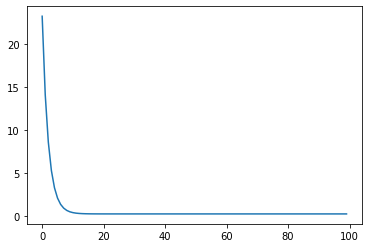

In [30]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

In [31]:
w

tensor([1.0205, 2.0037, 3.0029], requires_grad=True)

선형 회귀 모델의 구축과 최적화 준비

In [32]:
from torch import nn, optim

# Linear 층을 작성. 이번에는 절편은 회귀 계수에 포함하므로
# 입력 차원을 3으로 하고 bias(절편)을 False로 한다
net = nn.Linear(in_features=3, out_features=1, bias=False)

# SGD의 최적화기상에서 정의한 네트워크의 파라미터를 전달해서 초기화
optimizer = optim.SGD(net.parameters(), lr=0.1)

# MSE loss 클래스
loss_fn = nn.MSELoss()

In [33]:
# 손실 함수 로그
losses = []

# 100회 반복
for epoc in range(100):
    # 전회의 backward 메서드로 계산된 경사값을 초기화
    optimizer.zero_grad()
    
    # 선형 모델으로 y 예측값을 계산
    y_pred = net(X)
    
    # MSE loss 계산
    # y_pred는 (n, 1)과 같은 shape를 지니고 있으므로 (n,)으로 변경할 필요가 있다
    loss = loss_fn(y_pred.view_as(y), y)
    
    # loss의 w를 사용한 미분 계산
    loss.backward()
    
    # 경사를 갱신한다
    optimizer.step()
    
    # 수렴 확인을 위한 loss를 기록해둔다
    losses.append(loss.item())

In [34]:
list(net.parameters())

[Parameter containing:
 tensor([[1.0205, 2.0037, 3.0029]], requires_grad=True)]

In [35]:
import torch
from torch import nn, optim
from sklearn.datasets import load_iris
iris = load_iris()

# iris는 (0,1,2)의 세가지 종류를 분류하는 문제이므로 (0,1)의 두 개 데이터만 사용한다
# (0,1)의 두 개 데이터만 사용한다
X = iris.data[:100]
y = iris.target[:100]

# numpy의 ndarray를 pytorch의 tensor로 변환
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [37]:
# iris 데이터는 4차원
net = nn.Linear(4, 1)

# 시그모이드 함수를 적용해서 두 클래스의 분류를 위한 크로스 엔트로피 계산
loss_fn = nn.BCEWithLogitsLoss()

# SGD (약간 큰 학습률)
optimizer = optim.SGD(net.parameters(), lr=0.25)

# 손실 함수 로그
losses = []

# 100회 반복
for epoc in range(100):
    # 전회의 backward 메서드로 계산된 경사값을 초기화
    optimizer.zero_grad()
    
    # 선형 모델으로 y 예측값을 계산
    y_pred = net(X)
    
    # MSE loss를 사용한 미분 계산
    loss = loss_fn(y_pred.view_as(y), y)
    loss.backward()
    
    # 경사를 갱신한다
    optimizer.step()
    
    # 수렴 확인을 위한 loss를 기록해 둔다
    losses.append(loss.item())

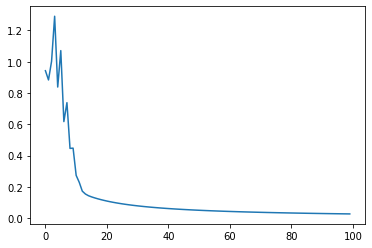

In [38]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

In [40]:
# 선형 결함의 결과
h = net(X)

# 시그모이드 함수를 적용한 결과는 y=1의 확률을 보여준다
prob = torch.sigmoid(h)

# 확률이 0.5 이상인 것을 클래스 1로 예측하고 그외는 0으로 한다
# pytorch에는 Bool형이 없으므로 ByteTensor가 출력된다.
y_pred = prob > 0.5

# 예측 결과 확인 (y는 FloatTensor이므로 ByteTensor로 변환한 후에 비교)
(y.byte() == y_pred.view_as(y)).sum().item()

100

다중 분류를 위한 로지스틱 회귀 분석

In [41]:
import torch
from torch import nn, optim
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

X = torch.tensor(X, dtype=torch.float32)
# CrossEntropyLoss 함수는 y로 int64형의 텐서를 받으니 주의하자
y = torch.tensor(y, dtype=torch.int64)

# 출력은 10(분류 수) 차원
net = nn.Linear(X.size()[1], 10)

# 소프트맥스 크로스 엔트로피
loss_fn = nn.CrossEntropyLoss()

# SGD
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [42]:
# 손실 함수 로그
losses = []

# 100회 반복
for epoc in range(100):
    # 전회의 backward 메서드로 계산된 경사값을 초기화
    optimizer.zero_grad()
    
    # 선형 모델으로 y 예측값을 계산
    y_pred = net(X)
    
    # MSE loss 미분 계산
    loss = loss_fn(y_pred, y)
    loss.backward()
    
    # 경사를 갱신한다
    optimizer.step()
    
    # 수렴 확인을 위한 loss를 기록해 둔다
    losses.append(loss.item())

# torch.max는 집계축을 지정하면 최댓값 뿐만 아니라 그 위치도 반환한다
_, y_pred = torch.max(net(X), 1)
# 정답률을 계산한다
(y_pred == y).sum().item() / len(y)

0.9443516972732332